In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from utils.conn_data import load_pickle

plt.style.use('ggplot')

In [72]:
model_name = "sdne-single-layer"
dataset_name = "cora"
outputs_path = os.path.join(os.getcwd(), "data", "outputs", dataset_name)
inputs_path = os.path.join(os.getcwd(), "data", "inputs", dataset_name)

args = load_pickle(os.path.join(outputs_path, model_name, "args.pickle"))["args"]

# graph info
graph_info = load_pickle(os.path.join(inputs_path, "graph_info.pickle"))

# train loss
train_loss = load_pickle(os.path.join(outputs_path, model_name, "epochs_train_loss.pickle"))["epochs_train_loss"]
train_loss_df = pd.DataFrame([val.item() for val in train_loss], columns=["train_loss"])

# embeddings
train_embeddings = load_pickle(os.path.join(outputs_path, model_name, "zs_train.pickle"))["zs_train"]

In [78]:
graph_info["Adj"].shape

torch.Size([2708, 2708])

<Axes: >

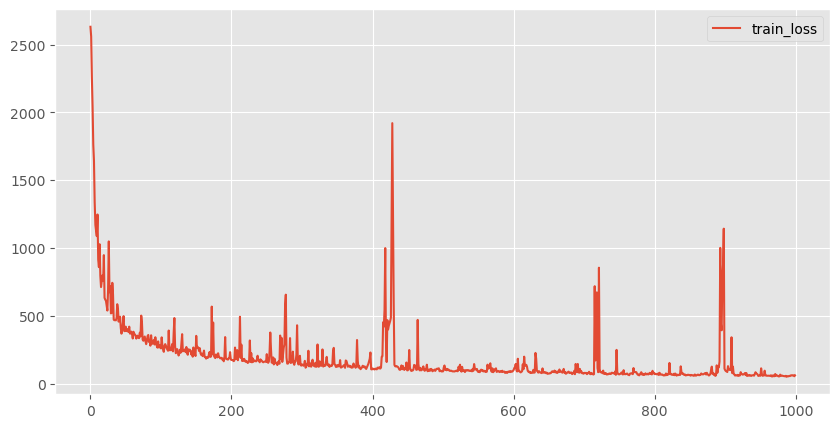

In [58]:
train_loss_df.plot(figsize=(10, 5))

In [74]:
tsne = TSNE(random_state = 0, n_iter = 1000, metric = 'cosine')
train_embeddings2d = tsne.fit_transform(train_embeddings.T)

train_embeddings2d_df = pd.DataFrame()
# embeddingsdf['game'] = gameslist
train_embeddings2d_df['x'] = train_embeddings2d[:,0]
train_embeddings2d_df['y'] = train_embeddings2d[:,1]

train_embeddings2d_df.shape

(100, 2)

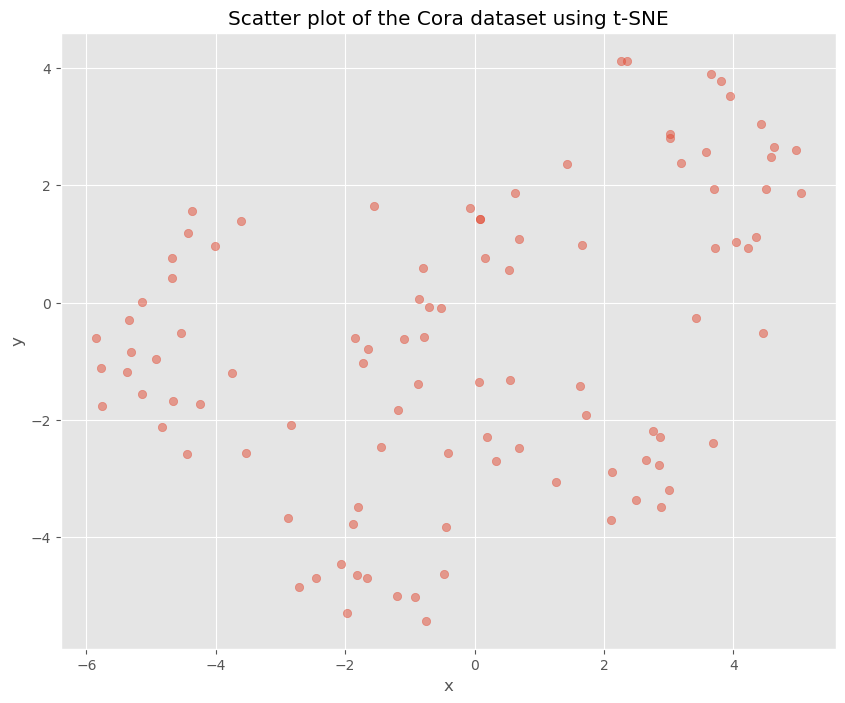

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(train_embeddings2d_df.x, train_embeddings2d_df.y, alpha=.5)
plt.title('Scatter plot of the Cora dataset using t-SNE')
plt.xlabel('x')
plt.ylabel('y')
plt.show()